<h1>Linear Regression</h1>
<p>
In this question, we are going to do a Linear Regression using gradient descent method on the available data. The information includes the cost of treating people based on age, BMA index and number of children. It is desirable to calculate the treatment cost of each person.
</p>

In [5]:
""" import all needed library """

import numpy as np
import matplotlib.pyplot as plt
import csv

<p>
All three methods of SGD, GD, and mini-batch GD are implemented on the mean square error function, and for each method, the graph of error changes (loss) is drawn on the entire data.
</p>

In [7]:
data = []

#read data from csv file
with open('./data/insurance.csv' , 'r') as file:
    reader = csv.reader(file , delimiter=',')

    # extracting field names through first row
    fields = next(reader)

    for row in reader:
        data.append(list(map(float, row)))

input = []
label = []

for i in data:
    input.append( i[:3])  
    label.append(i[3])  

In [8]:
def calculate_loss_and_Derivative_mse(weight , y_true , input):
    y_pred = np.dot(input , weight)
    residuals_b = np.reshape(y_pred - y_true , -1)
    gradient = np.array(np.transpose(input)) * residuals_b
    gradients = (2/len(y_true)) * np.sum(gradient , axis=1)
    squared_error = (y_pred - y_true) ** 2
    sum_squared_error = np.sum(squared_error)
    loss = sum_squared_error / len(y_true)
    return loss , gradients

def calculate_loss_and_Derivative_mae(weight , y_true , input):
    y_pred = np.dot(input , weight)
    gradient = np.array(np.transpose(input))
    gradients = (2/len(y_true)) * np.sum(gradient , axis=1)
    squared_error = np.abs(y_pred - y_true)
    sum_squared_error = np.sum(squared_error)
    loss = sum_squared_error / len(y_true)
    return loss , gradients

def optimize(alpha , epoch_size , inputs , labels , optimizer):
    w = np.random.rand(np.shape(inputs)[1])
    error = 99
    counter = 0
    errors = []
    max_error = 0.01
    max_counter = 100

    while error > max_error and counter < max_counter:
        counter += 1
        for i in range(0 , len(labels) ,epoch_size):
            selected_input_data = np.array(input[i:i+epoch_size])
            selected_label_data = np.array(labels[i:i+epoch_size])
            error , loss_Derivative = optimizer(w , selected_label_data , selected_input_data)
            w = w - alpha * loss_Derivative
            errors.append(error)

    return w , errors
    

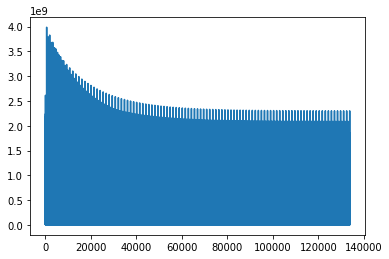

In [9]:
#SGD width mse
alpha = 0.00000001
w , errors = optimize(alpha , 1 , input , label , calculate_loss_and_Derivative_mse) 
plt.plot(range(len(errors)), errors)

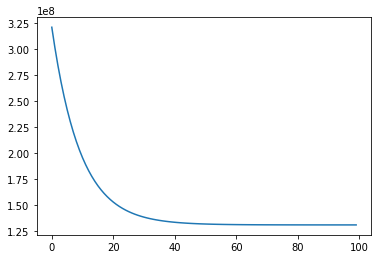

In [10]:
#GD and mse
alpha = 0.00001
w , errors = optimize(alpha , len(label) , input , label , calculate_loss_and_Derivative_mse) 
plt.plot(range(len(errors)), errors)


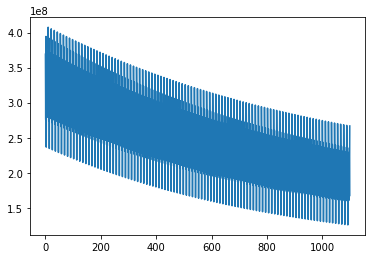

In [11]:
#mini-batch GD and mse
alpha = 0.0000001
w , errors = optimize(alpha , 128 , input , label , calculate_loss_and_Derivative_mse) 
plt.plot(range(len(errors)), errors)


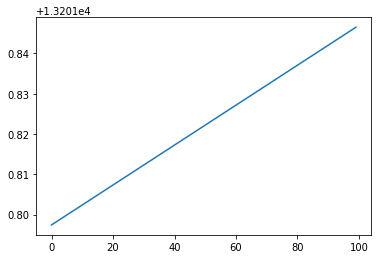

In [12]:
#GD and mae
alpha = 0.0000001
w , errors = optimize(alpha , len(label) , input , label , calculate_loss_and_Derivative_mae) 
plt.plot(range(len(errors)), errors)

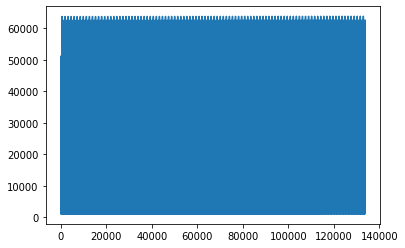

In [13]:
#SGD width mae
alpha = 0.0000001
w , errors = optimize(alpha , 1 , input , label , calculate_loss_and_Derivative_mae) 
plt.plot(range(len(errors)), errors)

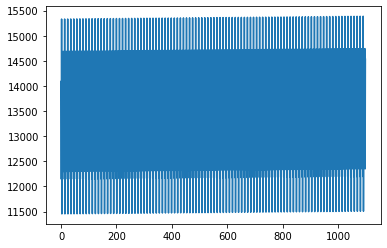

In [14]:
#mini-batch GD and mae
alpha = 0.00001
w , errors = optimize(alpha , 128 , input , label , calculate_loss_and_Derivative_mae) 
plt.plot(range(len(errors)), errors)

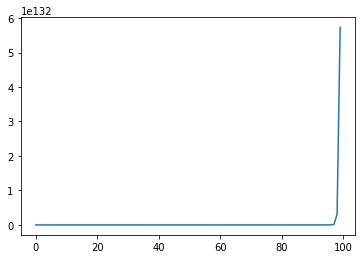

In [15]:
#GD and mse with big alpha
alpha = 0.001
w , errors = optimize(alpha , len(label) , input , label , calculate_loss_and_Derivative_mse) 
plt.plot(range(len(errors)), errors)

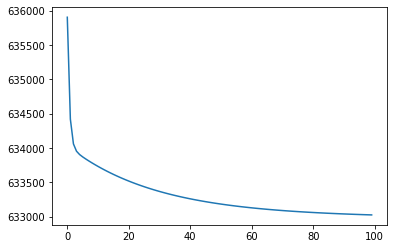

In [16]:
#GD with Mse after normalization

Age = np.array(data)[:,0]
Bmi = np.array(data)[:,1]
Children = np.array(data)[:,2]
Cost = np.array(data)[:,3]

meanAge = np.mean(Age)
meanBmi = np.mean(Bmi)
meanChildren = np.mean(Children)
meanCost = np.mean(Cost)

varAge = np.var(Age)
varBmi = np.var(Bmi)
varChildren = np.var(Children)
varCost = np.var(Cost)

normalize_data = data

for i in range(len(data)-1):
    selectedData = data[i]
    selectedData[0] = ( selectedData[0] - meanAge) / varAge
    selectedData[1] = ( selectedData[1] - meanBmi) / varBmi
    selectedData[2] = ( selectedData[2] - meanChildren) / varChildren
    selectedData[3] = ( selectedData[3] - meanCost) / varCost
    normalize_data[i] = selectedData

normalize_input = []
normalize_label = []

for i in normalize_data:
    normalize_input.append( i[:3])  
    normalize_label.append(i[3])  

alpha = 0.0001
w , errors = optimize(alpha , len(normalize_label) , normalize_input , normalize_label , calculate_loss_and_Derivative_mse) 
plt.plot(range(len(errors)), errors)


<h1>Effect of degree of data</h1>
<p>
The data related to this question is related to the drummer of a management job during consecutive years, which are divided into three categories of training, validation and testing, and each of them is placed in a separate file. The first column shows the year and the second column shows the amount of salary
</p>

In [17]:
incomeData_test = []
incomeData_train = []
incomeData_validation = []
with open('./data/data3/data3_test.csv' , 'r') as file:
    reader = csv.reader(file , delimiter=',')
    for row in reader:
        incomeData_test.append(list(map(float, row)))
        
with open('./data/data3/data3_train.csv' , 'r') as file:
    reader = csv.reader(file , delimiter=',')
    for row in reader:
        incomeData_train.append(list(map(float, row)))
with open('./data/data3/data3_validation.csv' , 'r') as file:
    reader = csv.reader(file , delimiter=',')
    for row in reader:
        incomeData_validation.append(list(map(float, row)))

def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

#year
x_test = np.array(incomeData_test)[:,0]
x_train = np.array(incomeData_train)[:,0]
x_validation = np.array(incomeData_validation)[:,0]

#income
y_test = np.array(incomeData_test)[:,1]
y_train = np.array(incomeData_train)[:,1]
y_validation = np.array(incomeData_validation)[:,1]

x_test_normalized = NormalizeData(x_test[:, np.newaxis])
x_train_normalized = NormalizeData(x_train[:, np.newaxis])
x_validation_normalized = NormalizeData(x_validation[:, np.newaxis])

y_test_normalized = y_test / 1000
y_train_normalized = y_train / 1000
y_validation_normalized = y_validation / 1000



[7.22435295]


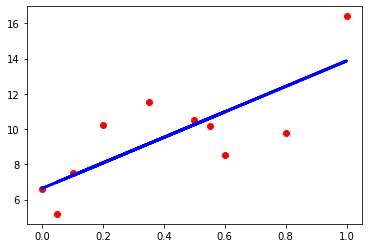

In [21]:
from sklearn.linear_model import LinearRegression

#fit  a line to data and calculate error
model = LinearRegression()
model.fit(x_train_normalized, y_train_normalized)
income_pred = model.predict(x_train_normalized)
plt.plot(x_train_normalized, income_pred, color="blue", linewidth=3)
plt.scatter(x_train_normalized,y_train_normalized ,c='red')
print(model.coef_)


In [22]:
def calculate_mse_error(X , Y , model):
    pred = model.predict(X)
    error = np.sum((pred - Y) ** 2)
    return error

In [23]:

test_error = calculate_mse_error(x_test_normalized , y_test_normalized , model)
validation_error = calculate_mse_error(x_train_normalized , y_train_normalized , model)
train_error = calculate_mse_error(x_validation_normalized , y_validation_normalized , model)

print(test_error , validation_error , train_error)

58.51601941458395 33.260992006334384 31.85156628326859


<p>
In each step, we add a high power feature from power 2 to 10 to the data and fit the line again
</p>

[4.52860607 2.88452126]
[  44.52365844 -103.8444236    70.63736024]
[  23.25689439    4.6808853  -108.14246308   91.23947006]
[  -17.75167568   361.17612924 -1151.82391933  1319.74867421
  -501.1758471 ]
[  -33.62608451   589.33219619 -2273.56314829  3734.63418678
 -2845.79093713   839.06256255]
[   -79.64336767   1565.72098066  -9467.9244994   28191.60076338
 -44644.65515967  35627.7258481  -11182.95466238]
[-1.07271954e+02  2.34604064e+03 -1.72119810e+04  6.49188435e+04
 -1.37812605e+05  1.65021433e+05 -1.03685612e+05  2.65409859e+04]
[-1.52495522e+02  4.06838280e+03 -4.13867526e+04  2.32220563e+05
 -7.76789874e+05  1.57182488e+06 -1.87489096e+06  1.20648159e+06
 -3.21365525e+05]
[-1.42195692e+02  3.59879301e+03 -3.34928575e+04  1.66207064e+05
 -4.64605516e+05  6.83815612e+05 -3.26990262e+05 -4.09276487e+05
  6.03835722e+05 -2.22940059e+05]


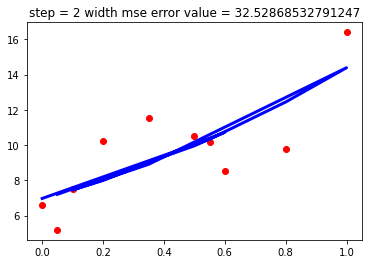

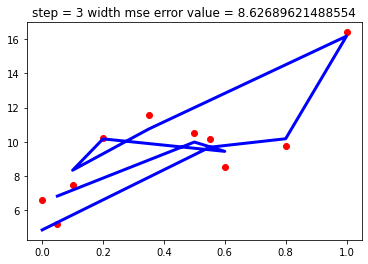

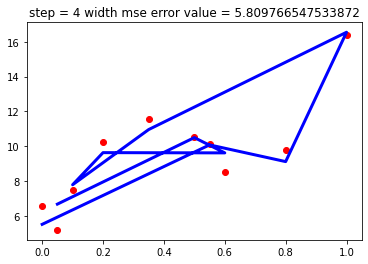

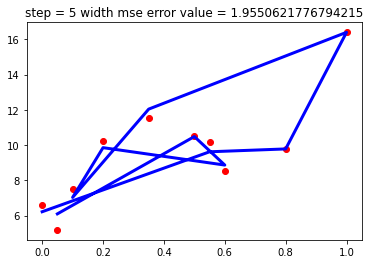

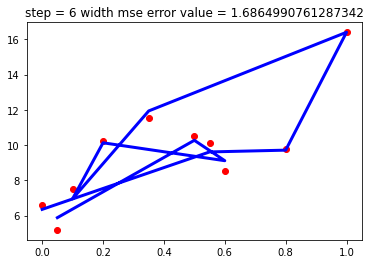

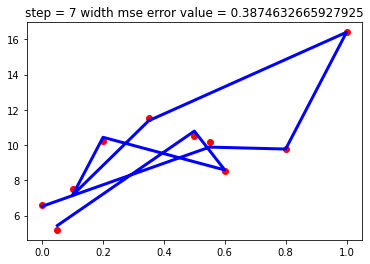

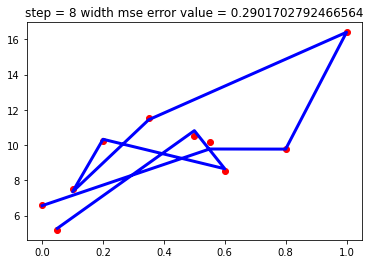

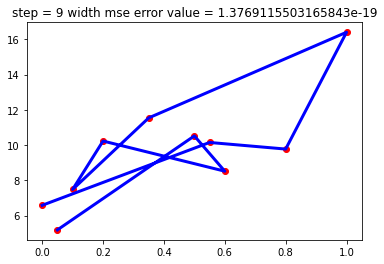

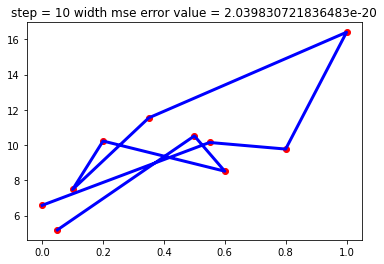

In [25]:
for i in range(2,11):
    newdata = np.copy(x_train_normalized)
    for j in range(2,i+1):
        newdata = np.insert(newdata , [np.shape(newdata)[1]], x_train_normalized ** j, axis=1)

    model = LinearRegression()
    model.fit(newdata, y_train_normalized)
    income_pred = model.predict(newdata)
    plt.figure()
    plt.plot(x_train_normalized, income_pred, color="blue", linewidth=3)
    plt.scatter(x_train_normalized, y_train_normalized , color="red")
    mseValue = np.sum((income_pred - y_train_normalized) ** 2)
    plt.title(f"step = {i} width mse error value = {mseValue}")
    print(model.coef_)


<p>
Now we add the regularization parameter and adjust its parameter using the validation data and the error is calculated on the test data.
</p>

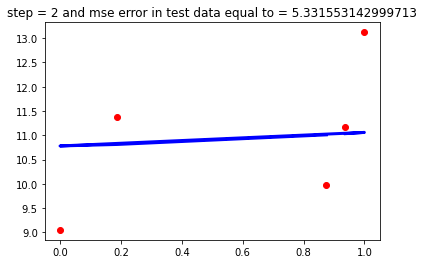

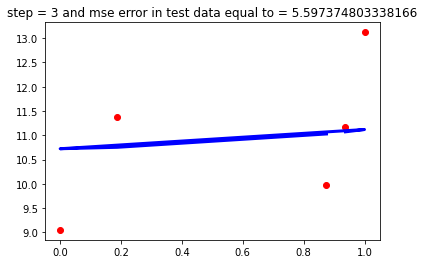

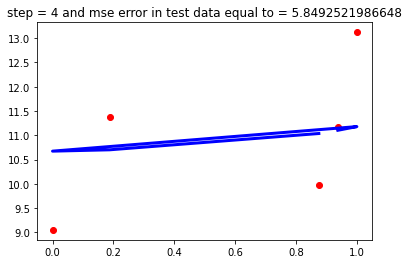

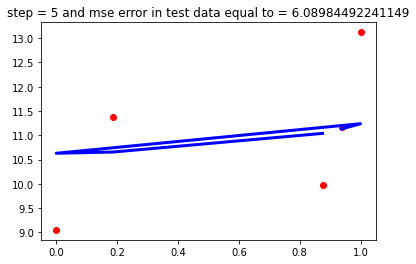

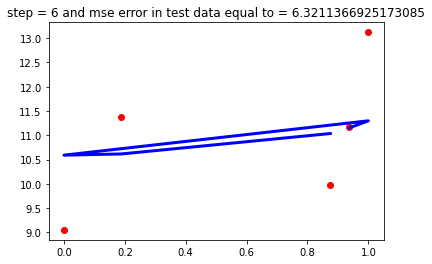

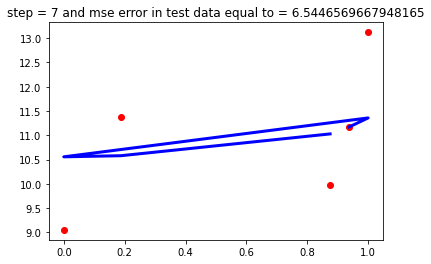

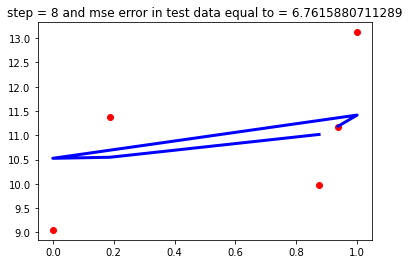

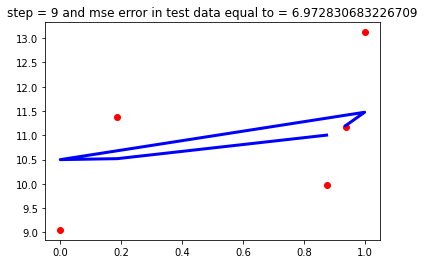

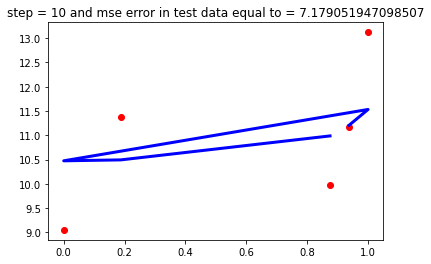

In [26]:
from sklearn.linear_model import Ridge

for i in range(2,11):
    newdata = np.copy(x_validation_normalized)
    for j in range(2,i+1):
        newdata = np.insert(newdata , [np.shape(newdata)[1]], x_validation_normalized ** j, axis=1)

    model = Ridge()
    model.alpha = 10
    model.fit(newdata, y_validation_normalized)
    income_pred = model.predict(newdata)
    plt.figure()
    plt.plot(x_validation_normalized, income_pred, color="blue", linewidth=3)
    plt.scatter(x_validation_normalized, y_validation_normalized , color="red")
    mseValue = np.sum((income_pred - y_test_normalized) ** 2)
    plt.title(f"step = {i} and mse error in test data equal to = {mseValue}")

<h1>Feature mapping</h1>
<p>
The data for this question represents the hours of cloudiness during the measurements of a period of 27 months. This collection includes three categories of training, validation and test data
</p>

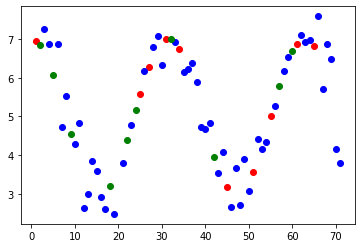

In [27]:
Data_test = []
Data_train = []
Data_validation = []
with open('./data/data4/data4_test.csv' , 'r') as file:
    reader = csv.reader(file , delimiter=',')
    for row in reader:
        Data_test.append(list(map(float, row)))
        
with open('./data/data4/data4_train.csv' , 'r') as file:
    reader = csv.reader(file , delimiter=',')
    for row in reader:
        Data_train.append(list(map(float, row)))
with open('./data/data4/data4_validation.csv' , 'r') as file:
    reader = csv.reader(file , delimiter=',')
    for row in reader:
        Data_validation.append(list(map(float, row)))

x_test = np.array(Data_test)[:,0]
y_test = np.array(Data_test)[:,1]

x_train = np.array(Data_train)[:,0]
y_train = np.array(Data_train)[:,1]

x_validation = np.array(Data_validation)[:,0]
y_validation = np.array(Data_validation)[:,1]

plt.scatter(x_test , y_test , c='red')
plt.scatter(x_train , y_train , c='blue')
plt.scatter(x_validation , y_validation , c='green')

<p>
First, we convert the input feature by a function and fit it in the new linear space on the data. The cos(x/j) function is used to transform space
</p>

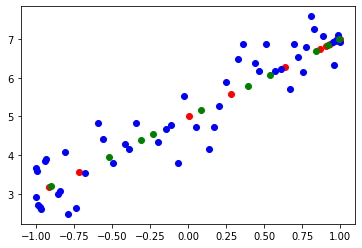

In [28]:
j = 5

x_test_new = np.reshape(np.cos(x_test/j) , (-1,1))
x_train_new = np.reshape(np.cos(x_train/j) , (-1 , 1))
x_validation_new =  np.reshape(np.cos(x_validation/j) , (-1 , 1))

y_test_new =  np.reshape(np.cos(y_test / j) , (-1,1))
y_train_new =  np.reshape(np.cos(y_train / j) , (-1,1))
y_validation_new =  np.reshape(np.cos(y_validation / j) , (-1,1))

plt.scatter(x_test_new , y_test , c='red')
plt.scatter(x_train_new , y_train , c='blue')
plt.scatter(x_validation_new , y_validation , c='green')

[[2.05582086]]


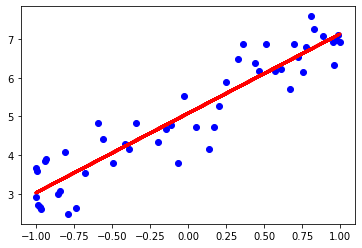

In [29]:
model = LinearRegression()
input = np.reshape(x_train_new , (-1,1))
model.fit(input, y_train[:, np.newaxis])

print(model.coef_)

pred = model.predict(input)
plt.plot(input, pred, color="red", linewidth=3)
plt.scatter(input , y_train , c='blue')

In [30]:
test_error = calculate_mse_error(x_test_new , y_test , model)
validation_error = calculate_mse_error(x_train_new , y_train , model)
train_error = calculate_mse_error(x_validation_new , y_validation , model)

print(test_error , validation_error , train_error)

382.61191880341266 10883.960344499283 320.39064978701145


<p>
By changing the value of J, we observe the changes and fit the line on it
</p>

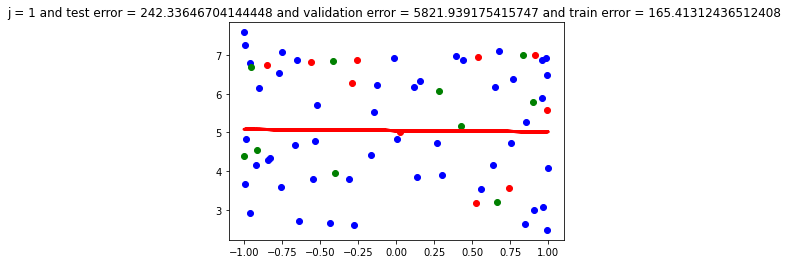

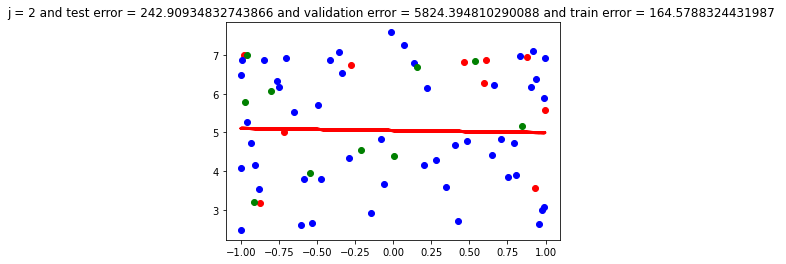

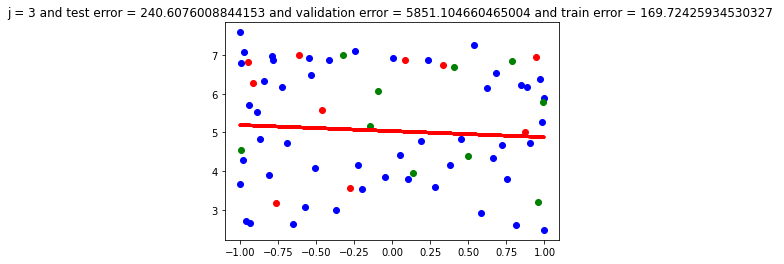

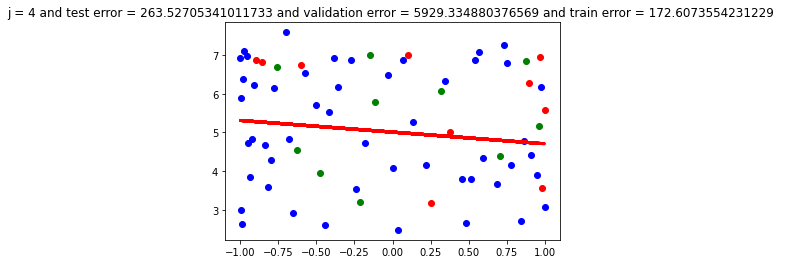

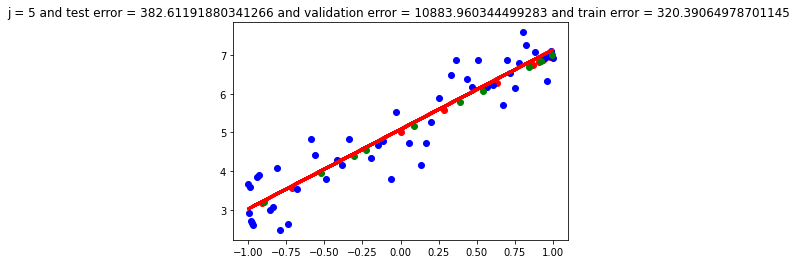

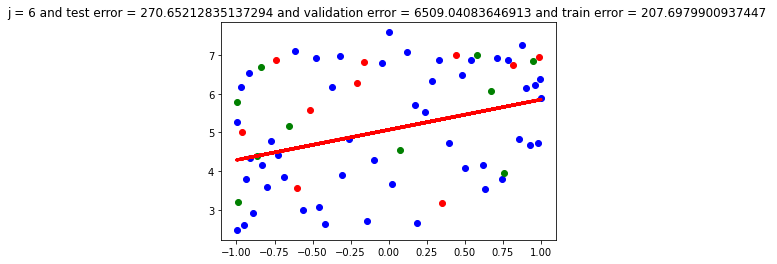

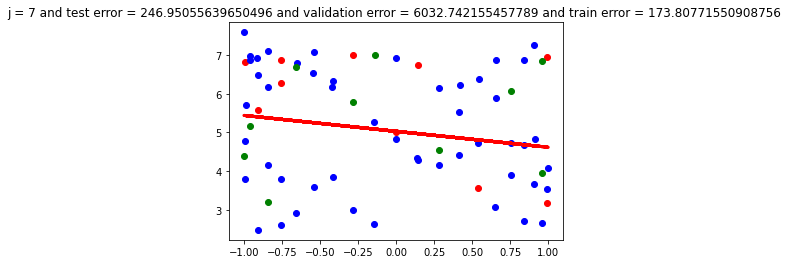

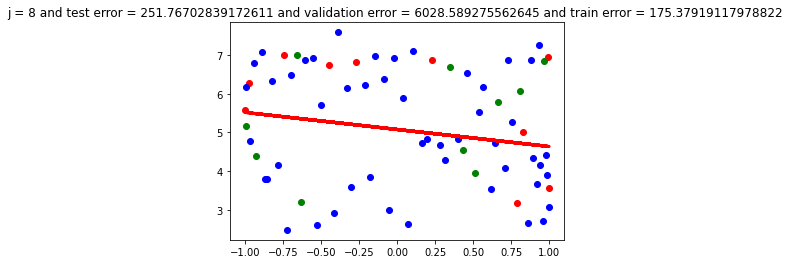

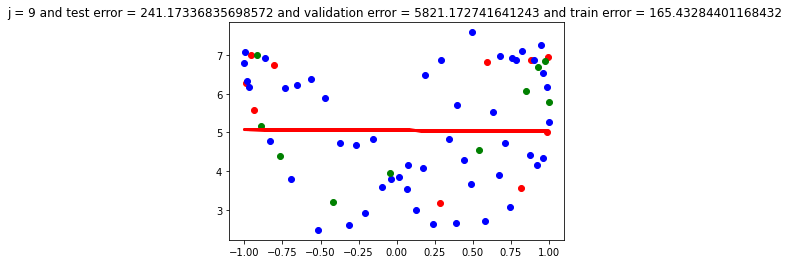

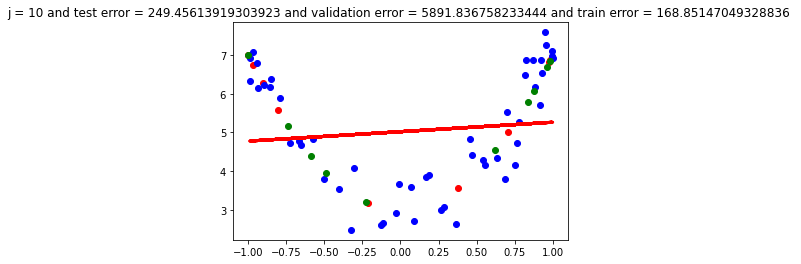

In [31]:
for j in range(1,11):
    x_test_new = np.reshape(np.cos(x_test/j) , (-1,1))
    x_train_new = np.reshape(np.cos(x_train/j) , (-1 , 1))
    x_validation_new =  np.reshape(np.cos(x_validation/j) , (-1 , 1))

    y_test_new =  np.reshape(np.cos(y_test / j) , (-1,1))
    y_train_new =  np.reshape(np.cos(y_train / j) , (-1,1))
    y_validation_new =  np.reshape(np.cos(y_validation / j) , (-1,1))

    plt.figure()
    plt.scatter(x_test_new , y_test , c='red')
    plt.scatter(x_train_new , y_train , c='blue')
    plt.scatter(x_validation_new , y_validation , c='green')

    model = LinearRegression()
    input = np.reshape(x_train_new , (-1,1))
    model.fit(input, y_train[:, np.newaxis])
    pred = model.predict(input)
    plt.plot(input, pred, color="red", linewidth=3)

    test_error = calculate_mse_error(x_test_new , y_test , model)
    validation_error = calculate_mse_error(x_train_new , y_train , model)
    train_error = calculate_mse_error(x_validation_new , y_validation , model)
    plt.title(f"j = {j} and test error = {test_error} and validation error = {validation_error} and train error = {train_error} ")